In [9]:
from TSP_Formulation_Methods import *
import numpy as np

distances = np.loadtxt("./data/matriz-rutas-granada")

# Global Parameters

N = 15
p = 10
startNode = 0
endNode = 9

# Process Parameters

p = min(p, N-1)
startNode = min(startNode, N-1)
endNode = min(endNode, N-1)

reduced_distances = distances[:N,:N]/np.max(distances[:N,:N])

maxDistance = np.max(reduced_distances)

lambdas_initial = [maxDistance for i in range(5)]

# Formulation with initial lambdas

Q_matrix_initial,_ = create_QUBO_matrix(reduced_distances, p, startNode, endNode, lambdas_initial)

if is_symmetric(Q_matrix_initial):
    print("QUBO matrix:\n")
    print(Q_matrix_initial)

    np.savetxt("./data/Q_matrix_initial", Q_matrix_initial, fmt='%d')

QUBO matrix:

[[-22.   2.   2. ...   1.   1.   1.]
 [  2. -21.   2. ...   1.   1.   1.]
 [  2.   2. -21. ...   1.   1.   1.]
 ...
 [  1.   1.   1. ... -21.   2.   2.]
 [  1.   1.   1. ...   2. -21.   2.]
 [  1.   1.   1. ...   2.   2. -21.]]


Naive solution:
[1 0 0 0 0 0 1 0 0 0 0 0 0 0 1]

Naive solution cost:
1.449521410098581

Naive solution total cost:
2.839808373176062


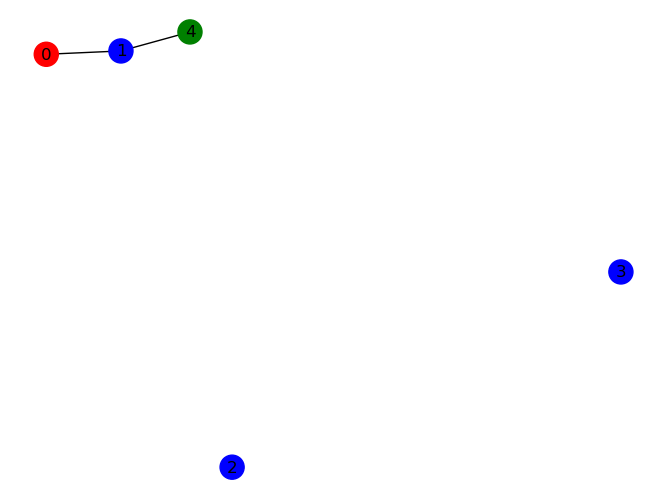

In [2]:
# Naive solution

naive_solution = generate_valid_initial_solution(N, p, startNode, endNode)
naive_solution_cost = calculate_distances_cost(naive_solution, reduced_distances, p)
naive_solution_total_cost = calculate_distances_cost_of_bidireccional_routes(naive_solution, reduced_distances,p)

print("Naive solution:")
print(naive_solution)
print("\nNaive solution cost:")
print(naive_solution_cost)
print("\nNaive solution total cost:")
print(naive_solution_total_cost)

check_solution(naive_solution, N,  p, startNode, endNode)

draw_solution_graph(naive_solution, reduced_distances, p, startNode, endNode)


Brute force solution:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]

Brute force solution cost:
0.0

Brute force solution total cost:
0.46629830036168607
Constraint 2 not fulfilled. At some point there is no stop activated.




Solutions ordered by matrix cost:

Solution:  100000000000001
Matrix cost:  -10.0
Distances cost: 0.0


Solution:  100000010000001
Matrix cost:  -9.983156307557236
Distances cost: 0.5084218462213824


Solution:  100000001001000
Matrix cost:  -9.083378663383817
Distances cost: 0.45831066830809164


Solution:  000100000000001
Matrix cost:  -9.0
Distances cost: 0.0


Solution:  001000000000001
Matrix cost:  -9.0
Distances cost: 0.0


Solution:  010000000000001
Matrix cost:  -9.0
Distances cost: 0.0


Solution:  100000000000010
Matrix cost:  -9.0
Distances cost: 0.0


Solution:  100000000000011
Matrix cost:  -9.0
Distances cost: 0.0


Solution:  100000000000100
Matrix cost:  -9.0
Distances cost: 0.0


Solution:  100000000000101
Matrix cost:  -9.0
Distances cost: 0.0




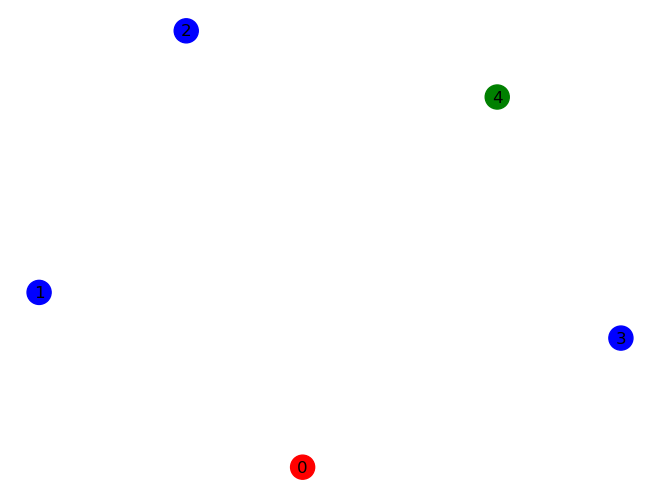

In [4]:
# Brute force solution

solutions_zipped = brute_force_finding(Q_matrix_initial, reduced_distances, p)

solution_brute_force = np.array(list(solutions_zipped[0][0]), dtype=int)
distance_of_solution_brute_force = solutions_zipped[0][-1]
total_distance_of_solution_brute_force = calculate_distances_cost_of_bidireccional_routes(solution_brute_force, reduced_distances, p)

print("\nBrute force solution:")
print(solution_brute_force)
print("\nBrute force solution cost:")
print(distance_of_solution_brute_force)
print("\nBrute force solution total cost:")
print(total_distance_of_solution_brute_force)

check_solution(solution_brute_force, N,  p, startNode, endNode)

draw_solution_graph(solution_brute_force, reduced_distances, p, startNode, endNode)

print("\n\n\n")
print("Solutions ordered by matrix cost:\n")
for i in range(len(solutions_zipped[:10])):
    print("Solution: ",solutions_zipped[i][0])
    print("Matrix cost: ",solutions_zipped[i][1])
    print("Distances cost:" ,solutions_zipped[i][2])
    print("\n")



D-Wave solution:
[1 0 0 0 0 0 0 1 0 0 0 0 0 1 1]

D-Wave solution cost:
0.9685075438747174

D-Wave solution total cost:
1.7706585740597593
Constraint 1 not fulfilled. Some stops are activated at the same time.


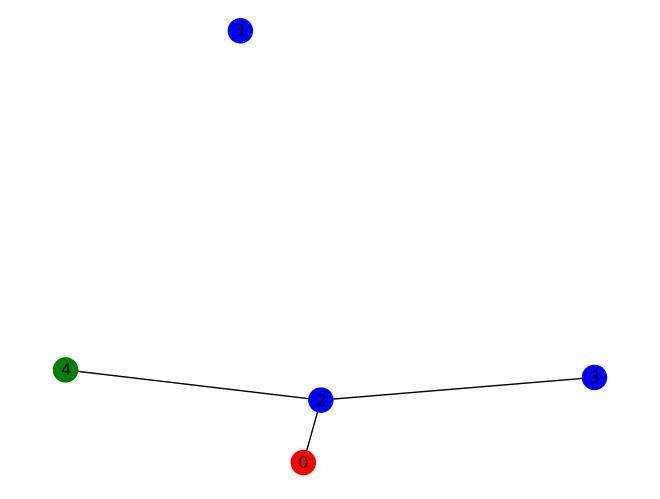

In [20]:
# Solve with D-Wave

solution_Dwave, _ = solve_qubo_with_Dwave(Q_matrix_initial, num_reads=10000)
cost_Dwave = calculate_distances_cost(solution_Dwave, reduced_distances, p)
total_cost_Dwave = calculate_distances_cost_of_bidireccional_routes(solution_Dwave, reduced_distances, p)

print("\nD-Wave solution:")
print(solution_Dwave)
print("\nD-Wave solution cost:")
print(cost_Dwave)
print("\nD-Wave solution total cost:")
print(total_cost_Dwave)

check_solution(solution_Dwave, N,  p, startNode, endNode)

draw_solution_graph(solution_Dwave, reduced_distances, p, startNode, endNode)

QUBO matrix optimized:

[[-60.          11.          11.          11.          11.
   11.          10.6081575   10.25202554  10.24785517  10.39501083
   11.          10.          10.          10.          10.        ]
 [ 11.         -50.          11.          11.          11.
   10.39028696  11.          10.62709115  10.19470927  10.84136391
   10.          11.          10.          10.          10.        ]
 [ 11.          11.         -50.          11.          11.
   10.24765477  10.67424394  11.          10.4600857   10.25639631
   10.          10.          11.          10.          10.        ]
 [ 11.          11.          11.         -50.          11.
   10.21859582  10.2104555   10.55449626  11.          10.76541937
   10.          10.          10.          11.          10.        ]
 [ 11.          11.          11.          11.         -50.
   10.4662983   11.          10.24416197  10.56509872  11.
   10.          10.          10.          10.          11.        ]
 [ 11.        

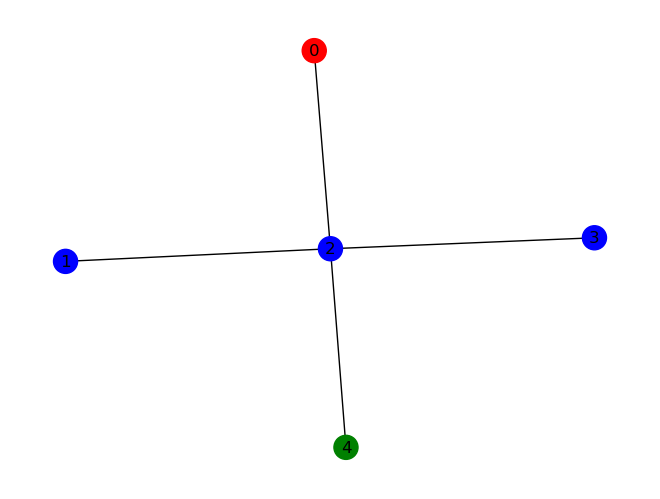

In [21]:
# Optimize lambdas once with naive solution

lambdas_optimized = optimize_lambdas(reduced_distances,p, startNode, endNode, methodIndex=2, initial_lambdas=lambdas_initial, initial_solution=naive_solution)

Q_matrix_optimized,_ = create_QUBO_matrix(reduced_distances, p, startNode, endNode, lambdas_optimized)

if is_symmetric(Q_matrix_optimized):
    print("QUBO matrix optimized:\n")
    print(Q_matrix_optimized)

solution_Dwave_optimized, _ = solve_qubo_with_Dwave(Q_matrix_optimized, num_reads=10000)
cost_Dwave_optimized = calculate_distances_cost(solution_Dwave_optimized, reduced_distances, p)
total_cost_Dwave_optimized = calculate_distances_cost_of_bidireccional_routes(solution_Dwave_optimized, reduced_distances, p)

print("\nD-Wave solution optimized:")
print(solution_Dwave_optimized)
print("\nD-Wave solution cost optimized:")
print(cost_Dwave_optimized)
print("\nD-Wave solution total cost optimized:")
print(total_cost_Dwave_optimized)

check_solution(solution_Dwave_optimized, N,  p, startNode, endNode)

draw_solution_graph(solution_Dwave_optimized, reduced_distances, p, startNode, endNode)

Solution: [1 0 0 0 0 0 0 1 0 0 0 0 0 0 1] 

SOlution matrix cost: -22.954559812010075 

Distances cost: 0.5084218462213824 

Total distances cost: 1.0002385792130704 

Lambdas: [9.99999997 2.03438847 1.         2.83095362 2.83095362] 

Solution validity: True 



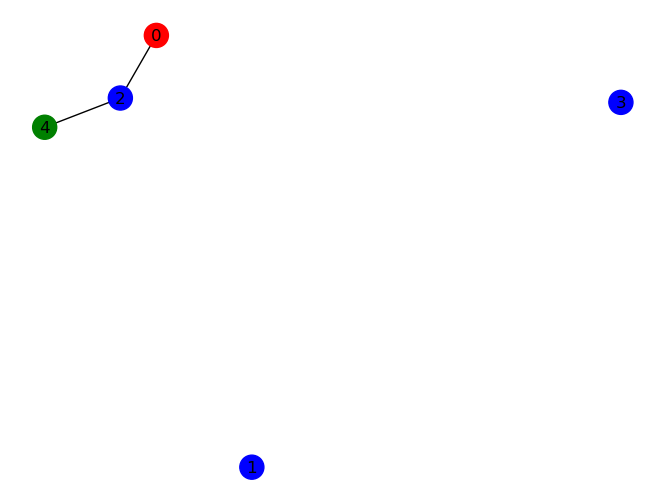

In [22]:
# Iterate over optimization of lambdas and D-Wave solution

solutionDict = contruct_complete_solution(reduced_distances, p, startNode, endNode, method=2,iterations_lambda=100, iterations_solver=100)


print("Solution:", solutionDict["best_solution"], "\n")
print("SOlution matrix cost:", solutionDict["best_solution_matrix_cost"], "\n")
print("Distances cost:", solutionDict["best_solution_cost"], "\n")
print("Total distances cost:", solutionDict["best_solution_total_cost"], "\n")
print("Lambdas:", solutionDict["lambdas"], "\n")
print("Solution validity:", solutionDict["solution_validity"], "\n")

if solutionDict["solution_validity"]:
    np.savetxt("./data/Q_best_solution", solutionDict["Q_matrix"], fmt='%d')

draw_solution_graph(solutionDict["best_solution"], reduced_distances, p, startNode, endNode)

QUBO matrix upper bound:

[[-6.         37.87762795 37.87762795 37.87762795 37.87762795  2.
   1.6081575   1.25202554  1.24785517  1.39501083  2.          1.
   1.          1.          1.        ]
 [37.87762795 -5.         37.87762795 37.87762795 37.87762795  1.39028696
   2.          1.62709115  1.19470927  1.84136391  1.          2.
   1.          1.          1.        ]
 [37.87762795 37.87762795 -5.         37.87762795 37.87762795  1.24765477
   1.67424394  2.          1.4600857   1.25639631  1.          1.
   2.          1.          1.        ]
 [37.87762795 37.87762795 37.87762795 -5.         37.87762795  1.21859582
   1.2104555   1.55449626  2.          1.76541937  1.          1.
   1.          2.          1.        ]
 [37.87762795 37.87762795 37.87762795 37.87762795 -5.          1.4662983
   2.          1.24416197  1.56509872  2.          1.          1.
   1.          1.          2.        ]
 [ 2.          1.39028696  1.24765477  1.21859582  1.4662983  -5.
  37.87762795 37.87762

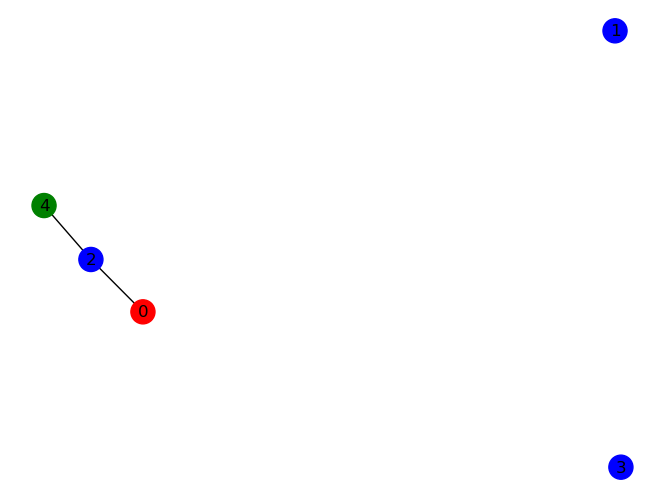

In [33]:
# Setting wirights with upper bound

def calculate_upper_bound_distances(distances, p):
    distances_QUBO = convertCostMatrixToQUBORepresentation(distances, p)
    distances_QUBO_t = distances_QUBO.T + distances_QUBO
    maxArray = np.ones(distances_QUBO_t.shape[0])
    return maxArray.T @ distances_QUBO_t @ maxArray

upper_bound = calculate_upper_bound_distances(reduced_distances,p)

lambdas_upper_bound = [upper_bound, 1.0, 1.0, 1.0, 1.0]

Q_matrix_upper_bound,_ = create_QUBO_matrix(reduced_distances, p, startNode, endNode, lambdas_upper_bound)

if is_symmetric(Q_matrix_upper_bound):
    print("QUBO matrix upper bound:\n")
    print(Q_matrix_upper_bound) 

    np.savetxt("./data/Q_matrix_upper_bound", Q_matrix_upper_bound, fmt='%d')

solution_upper_bound, _ = solve_qubo_with_Dwave(Q_matrix_upper_bound, num_reads=100)
cost_upper_bound = calculate_distances_cost(solution_upper_bound, reduced_distances, p)
total_cost_upper_bound = calculate_distances_cost_of_bidireccional_routes(solution_upper_bound, reduced_distances, p)

print("\nD-Wave solution upper bound:")
print(solution_upper_bound)
print("\nD-Wave solution cost upper bound:")
print(cost_upper_bound)
print("\nD-Wave solution total cost upper bound:")
print(total_cost_upper_bound)

check_solution(solution_upper_bound, N,  p, startNode, endNode)

draw_solution_graph(solution_upper_bound, reduced_distances, p, startNode, endNode)


Optimized solution:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]

Optimized solution cost:
2.121993190056017

Optimized solution total cost:
4.418637645077435

Lambdas optimized:
[11.1, 1.1, 4.1, 1.1, 1.1]
QUBO matrix optimized:

[[-24.2  12.2  12.2 ...   1.1   1.1   1.1]
 [ 12.2 -23.1  12.2 ...   1.1   1.1   1.1]
 [ 12.2  12.2 -23.1 ...   1.1   1.1   1.1]
 ...
 [  1.1   1.1   1.1 ... -23.1  12.2  12.2]
 [  1.1   1.1   1.1 ...  12.2 -23.1  12.2]
 [  1.1   1.1   1.1 ...  12.2  12.2 -23.1]]


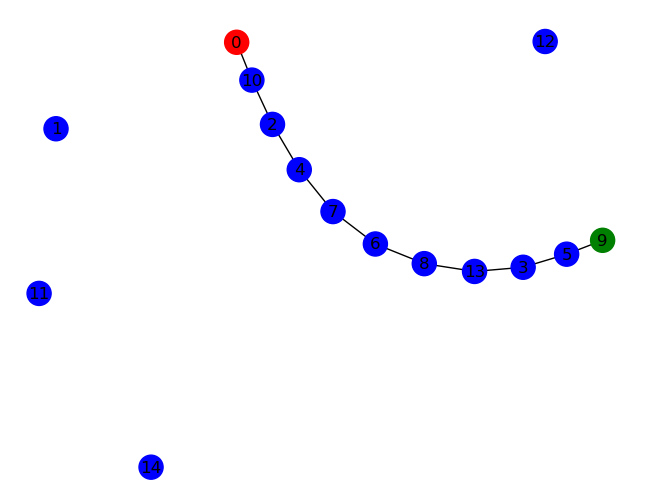

In [10]:
# Optimizing lambdas with iteration updating

def update_lambdas(lambdas, scaling_factor, solution, N, p, startNode, endNode):
    lambdas_updated = []
    endNode = N*p + endNode
    for i in range(len(lambdas)):
        sum = lambdas[i]
        if i == 0:
            if not check_constraint_1(solution,N, p):
                sum = sum + scaling_factor
        elif i == 1:
            if not check_constraint_2(solution,N, p):
                sum = sum + scaling_factor
        elif i == 2:
            if not check_constraint_3(solution,N, p):
                sum = sum + scaling_factor
        elif i == 3:
            if not check_constraint_4(solution, startNode):
                sum = sum + scaling_factor
        elif i == 4:
            if not check_constraint_5(solution, endNode):
                sum = sum + scaling_factor
        lambdas_updated.append(sum)

    return lambdas_updated

def find_optimized_solution(reduced_distances, p, startNode, endNode, scaling_factor, max_iterations, num_reads_solver):
    lambdas = [0.1*np.max(reduced_distances) for i in range(5)]
    Q_matrix,_ = create_QUBO_matrix(reduced_distances, p, startNode, endNode, lambdas)
    solution, _ = solve_qubo_with_Dwave(Q_matrix, num_reads=num_reads_solver)
    if check_solution_return(solution, N, p, startNode, endNode):
        return solution, lambdas
    else:
        for i in range(max_iterations):
            lambdas = update_lambdas(lambdas, scaling_factor, solution, N, p, startNode, endNode)
            Q_matrix,_ = create_QUBO_matrix(reduced_distances, p, startNode, endNode, lambdas)
            solution, _ = solve_qubo_with_Dwave(Q_matrix, num_reads=num_reads_solver)
            if check_solution_return(solution, N, p, startNode, endNode):
                return solution, lambdas
        print("No solution found")
        return solution, lambdas
    


scaling_factor = 1.0
max_iterations = 100
num_reads_solver = 100

solution_optimized, lambdas_optimized = find_optimized_solution(reduced_distances, p, startNode, endNode, scaling_factor, max_iterations, num_reads_solver)

if solution_optimized is not None:
    solution_optimized_cost = calculate_distances_cost(solution_optimized, reduced_distances, p)
    solution_optimized_total_cost = calculate_distances_cost_of_bidireccional_routes(solution_optimized, reduced_distances, p)

    print("\nOptimized solution:")
    print(solution_optimized)
    print("\nOptimized solution cost:")
    print(solution_optimized_cost)
    print("\nOptimized solution total cost:")
    print(solution_optimized_total_cost)

    check_solution(solution_optimized, N,  p, startNode, endNode)

    draw_solution_graph(solution_optimized, reduced_distances, p, startNode, endNode)

    print("\nLambdas optimized:")
    print(lambdas_optimized)

    Q_matrix_optimized,_ = create_QUBO_matrix(reduced_distances, p, startNode, endNode, lambdas_optimized)

    if is_symmetric(Q_matrix_optimized):
        print("QUBO matrix optimized:\n")
        print(Q_matrix_optimized)

        np.savetxt("./data/Q_matrix_optimized", Q_matrix_optimized, fmt='%d')
